In [3]:
import pandas as pd

## Задача
Напишите функцию filter_by_year() для отбора фильмов по годам. Она должна возвращать таблицу с фильмами, снятыми в определённый период.
На вход функция принимает три аргумента: данные о фильмах и границы периода. Фильмы, снятые в последний год промежутка, должны быть отсеяны, а в первый — включены (это требуется, чтобы промежутки не накладывались друг на друга). Пользуйтесь сокращённой записью для условий.

In [6]:
# Загрузим ниши данные:
data=pd.read_excel('movies.xlsx', dtype={'a': int, 'e': str})


def filter_by_year(data, begin, end):
    return data.loc[(data['Год']>= begin)&(data['Год']<end)]
    
# отфильтруем фильмы 2000-2009 годов:
filter_by_year(data, 2000, 2010)

,Название,Год,Рейтинг,"Длина, мин.",Жанр,"Бюджет, \$ млн","Сборы, \$ млн"
8,Повелитель бури,2008,7.298,126,"триллер, драма, военный, история",15.0,49.230772
9,Миллионер из трущоб,2008,7.724,120,"драма, мелодрама",15.0,377.910544
10,Старикам тут не место,2007,7.726,122,"триллер, драма, криминал",25.0,171.627166
11,Отступники,2006,8.456,151,"триллер, драма, криминал",90.0,289.847354
12,Столкновение,2004,7.896,108,"триллер, драма, криминал",6.5,98.410061
13,Малышка на миллион,2004,8.075,132,"драма, спорт",30.0,216.763646
14,Властелин колец: Возвращение Короля,2003,8.617,201,"фэнтези, драма, приключения",94.0,1119.110941
15,Чикаго,2002,7.669,113,"мюзикл, комедия, криминал",45.0,306.776732
16,Игры разума,2001,8.557,135,"драма, биография, мелодрама",58.0,313.542341
17,Гладиатор,2000,8.585,155,"боевик, драма, приключения",103.0,457.640427


# Анализ

Вот теперь можно приступать к анализу:

## Задача
Поделите 30 лет на 3 периода по 10 лет. Для фильмов из каждого диапазона посчитайте средние рейтинг, длину, стоимость съёмок одной минуты и сборы. Допишите код, чтобы создать таблицу с этой информацией и вывести её на экран.

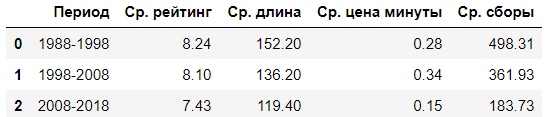

C:\Users\User\AppData\Local\Temp\ipykernel_50832\2310268860.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_data = group_data.append(group_info, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_50832\2310268860.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_data = group_data.append(group_info, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_50832\2310268860.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_data = group_data.append(group_info, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_50832\2310268860.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  group_

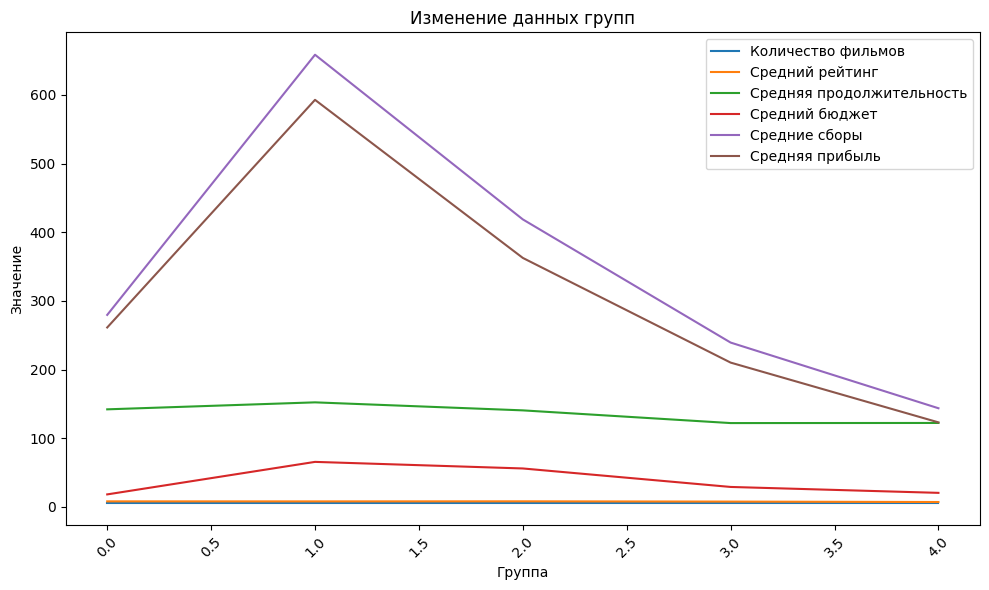

In [35]:
from matplotlib import pyplot as plt

data = data.rename(columns={'Сборы, \$ млн': 'Сборы, $ млн',
                            'Бюджет, \$ млн': 'Бюджет, $ млн'})

data['Прибыль, $ млн'] = data['Сборы, $ млн'] - data['Бюджет, $ млн']
grouped_data = data.groupby('Год')

# Задать количество групп и их интервалы
num_groups = 5
group_intervals = pd.cut(data['Год'], num_groups).cat.codes

# Добавить новый столбец с информацией о принадлежности к группе
data['Группа'] = group_intervals

# Группировка датафрейма по новому столбцу "Группа"
grouped_df = data.groupby('Группа')
group_data = pd.DataFrame()
# Вывод аналитики групп
for group, group_df in grouped_df:
    group_info = {
        'Группа': group,
        'Количество фильмов': len(group_df),
        'Средний рейтинг': group_df['Рейтинг'].mean(),
        'Средняя продолжительность': group_df['Длина, мин.'].mean(),
        'Средний бюджет': group_df['Бюджет, $ млн'].mean(),
        'Средние сборы': group_df['Сборы, $ млн'].mean(),
        'Средняя прибыль': group_df['Прибыль, $ млн'].mean()
    }
    group_data = group_data.append(group_info, ignore_index=True)

# Построение графиков изменения данных для каждой группы
plt.figure(figsize=(10, 6))

plt.plot(group_data['Группа'], group_data['Количество фильмов'], label='Количество фильмов')
plt.plot(group_data['Группа'], group_data['Средний рейтинг'], label='Средний рейтинг')
plt.plot(group_data['Группа'], group_data['Средняя продолжительность'], label='Средняя продолжительность')
plt.plot(group_data['Группа'], group_data['Средний бюджет'], label='Средний бюджет')
plt.plot(group_data['Группа'], group_data['Средние сборы'], label='Средние сборы')
plt.plot(group_data['Группа'], group_data['Средняя прибыль'], label='Средняя прибыль')

plt.xlabel('Группа')
plt.ylabel('Значение')
plt.title('Изменение данных групп')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()